In [1]:
# !pip install pandas yfinance matplotlib prophet

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
# df = dat.history(start="2021-01-01")
df = dat.history(period='max')

# Define the stock ticker and the time period
ticker = "SOXL"
end_time = datetime.now()
start_time = end_time - timedelta(days=1)  # Last day

In [3]:
# df has 2010-03-11 00:00:00-05:00 in the index, instead I want 2010-03-11
df.index = df.index.map(lambda x: x.replace(tzinfo=None))

In [4]:
# drop the columns 'Dividends', 'Stock Splits', and 'Capital Gains'
df.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'], inplace=True)
df


,Open,High,Low,Close,Volume
Date,,,,,
2010-03-11,0.589992,0.606521,0.589992,0.606521,3702000
2010-03-12,0.606980,0.610959,0.591523,0.591523,4548000
2010-03-15,0.579586,0.585860,0.563975,0.572851,534000
2010-03-16,0.580045,0.619990,0.579126,0.619377,1260000
2010-03-17,0.642793,0.649221,0.630091,0.641721,2610000
...,...,...,...,...,...
2024-11-20,27.340000,27.559999,26.000000,27.129999,90911700
2024-11-21,28.049999,28.920000,26.469999,28.490000,106013200
2024-11-22,28.250000,28.690001,27.840000,28.490000,52604100


In [5]:
# add open_close_diff, high_low_diff columns
df['open_close_diff'] = df['Open'] - df['Close']
df['high_low_diff'] = df['High'] - df['Low']
df


,Open,High,Low,Close,Volume,open_close_diff,high_low_diff
Date,,,,,,,
2010-03-11,0.589992,0.606521,0.589992,0.606521,3702000,-0.016529,0.016529
2010-03-12,0.606980,0.610959,0.591523,0.591523,4548000,0.015457,0.019436
2010-03-15,0.579586,0.585860,0.563975,0.572851,534000,0.006735,0.021885
2010-03-16,0.580045,0.619990,0.579126,0.619377,1260000,-0.039332,0.040863
2010-03-17,0.642793,0.649221,0.630091,0.641721,2610000,0.001072,0.019130
...,...,...,...,...,...,...,...
2024-11-20,27.340000,27.559999,26.000000,27.129999,90911700,0.210001,1.559999
2024-11-21,28.049999,28.920000,26.469999,28.490000,106013200,-0.440001,2.450001
2024-11-22,28.250000,28.690001,27.840000,28.490000,52604100,-0.240000,0.850000


<Figure size 2000x800 with 0 Axes>

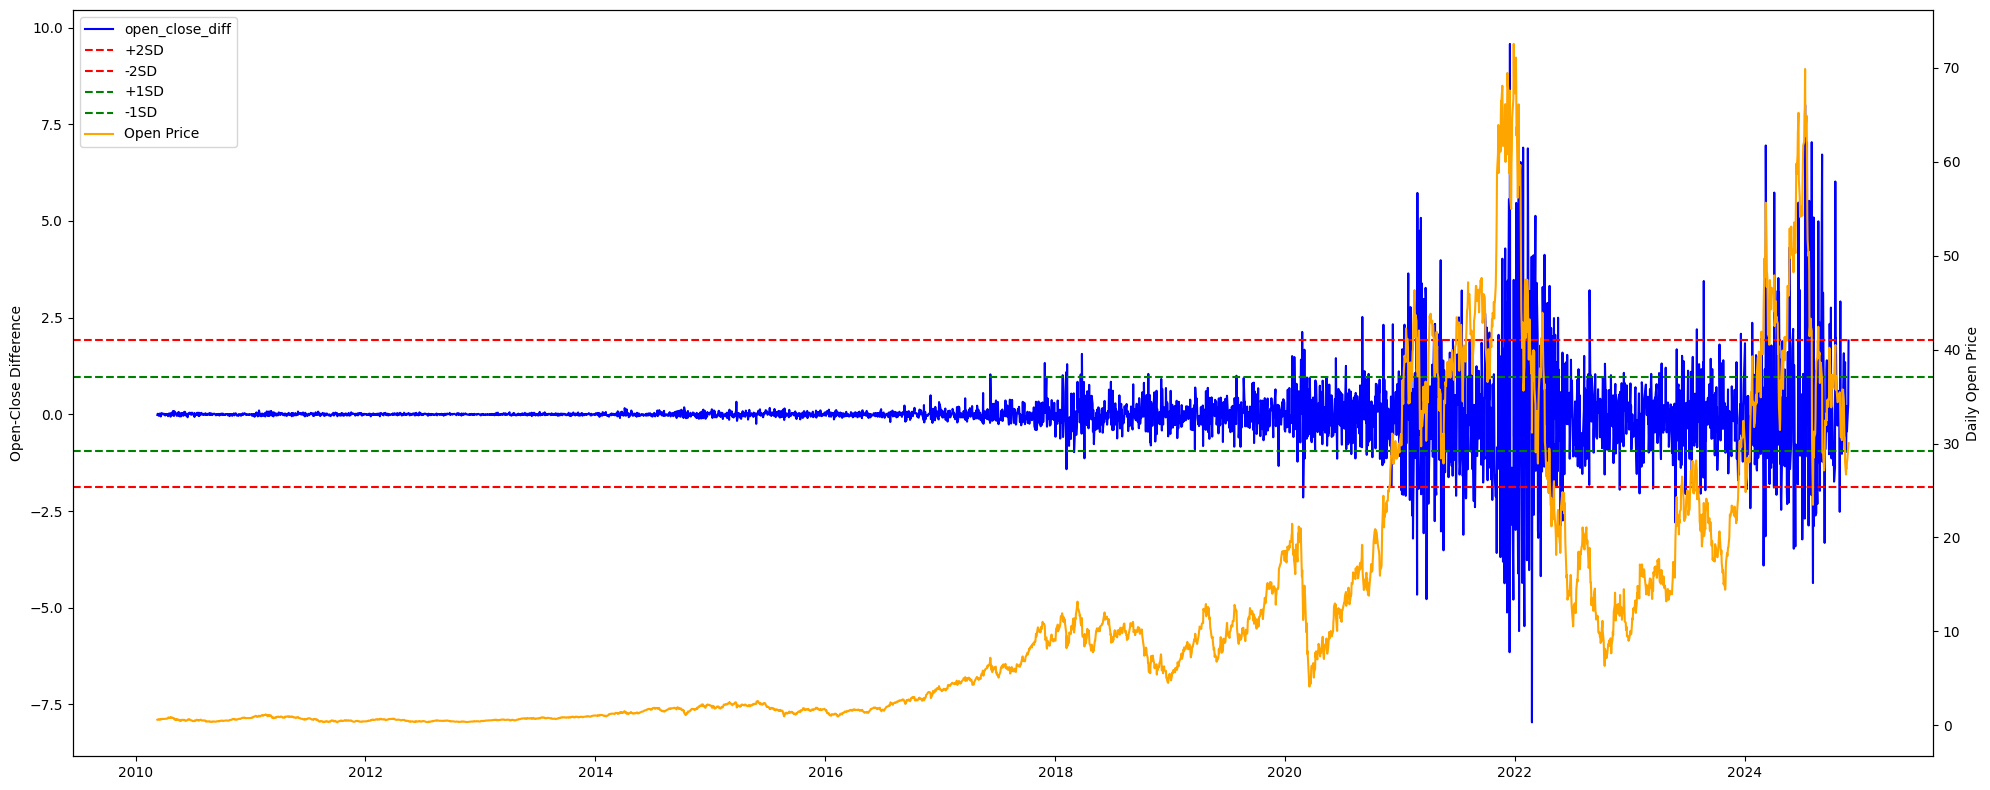

In [6]:
# plot open_close_diff and high_low_diff with 2SD and 1SD lines
plt.figure(figsize=(20, 8))  # Set a wider figure size
fig, ax1 = plt.subplots(figsize=(20, 8))  # Create subplot with wider size

# Plot open_close_diff on left y-axis
ax1.plot(df['open_close_diff'], label='open_close_diff', color='blue')
# plt.plot(df['high_low_diff'], label='high_low_diff')

# Calculate and plot 2 standard deviations and 1 standard deviation
mean = df['open_close_diff'].mean()
std = df['open_close_diff'].std()
ax1.axhline(y=mean + 2*std, color='r', linestyle='--', label='+2SD')
ax1.axhline(y=mean - 2*std, color='r', linestyle='--', label='-2SD')
ax1.axhline(y=mean + std, color='g', linestyle='--', label='+1SD')
ax1.axhline(y=mean - std, color='g', linestyle='--', label='-1SD')

# Create second y-axis and plot Open price
ax2 = ax1.twinx()
ax2.plot(df['Open'], label='Open Price', color='orange')

# Set labels for both y-axes
ax1.set_ylabel('Open-Close Difference')
ax2.set_ylabel('Daily Open Price')

# Add legends for both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()  # Adjust layout to use maximum space
plt.show()


Number of data points: 3705

First few rows:
           ds         y
0  2010-03-11  0.589992
1  2010-03-12  0.606980
2  2010-03-15  0.579586
3  2010-03-16  0.580045
4  2010-03-17  0.642793

Last few rows:
              ds          y
3700  2024-11-20  27.340000
3701  2024-11-21  28.049999
3702  2024-11-22  28.250000
3703  2024-11-25  29.580000
3704  2024-11-26  30.040001


16:02:38 - cmdstanpy - INFO - Chain [1] start processing
16:02:39 - cmdstanpy - INFO - Chain [1] done processing


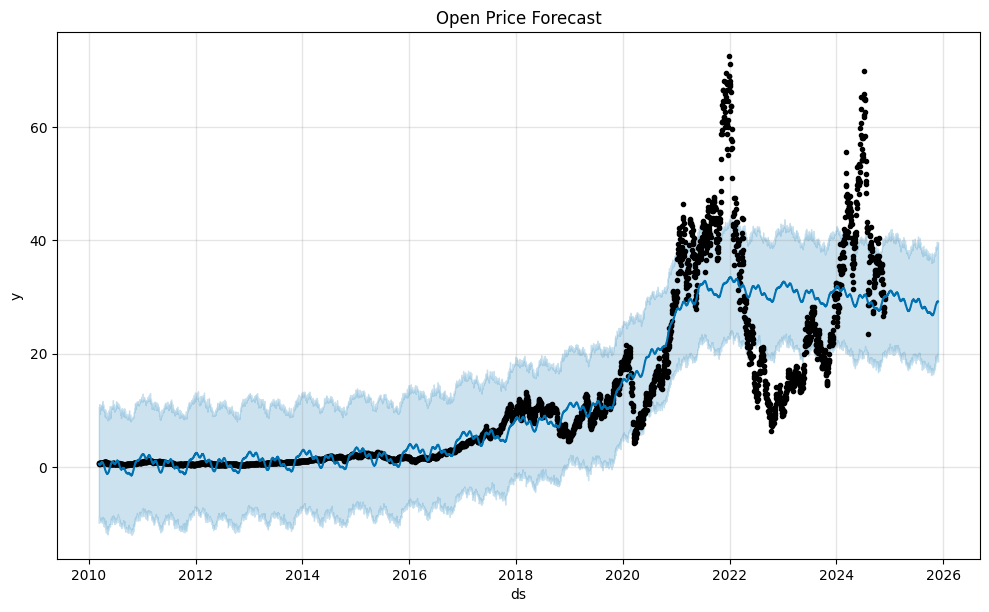

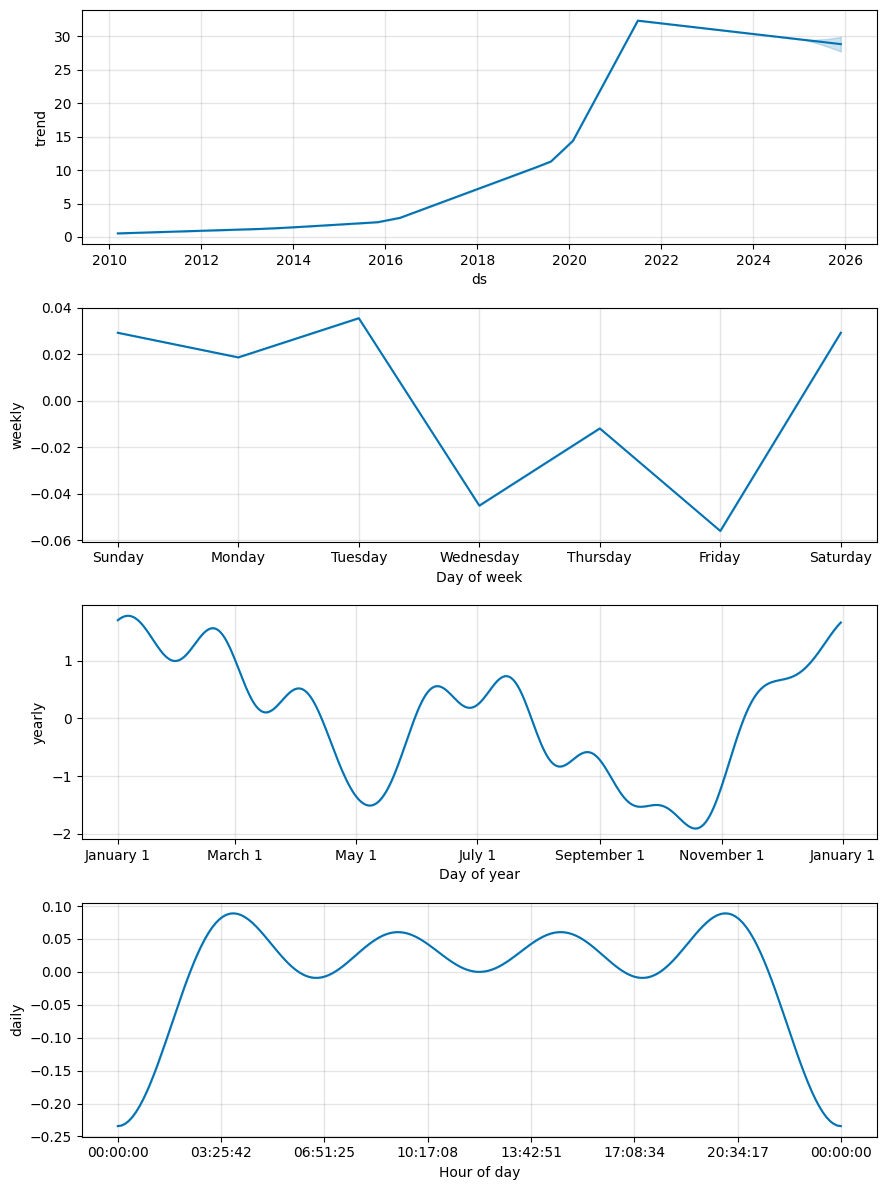


Last few predictions:
             ds       yhat  yhat_lower  yhat_upper
4065 2025-11-22  29.198287   19.244029   38.947999
4066 2025-11-23  29.221279   20.012380   39.665166
4067 2025-11-24  29.229396   19.508287   39.670267
4068 2025-11-25  29.261217   18.911708   39.278095
4069 2025-11-26  29.192433   18.583209   39.625539


In [12]:
# This code uses Facebook's Prophet library to forecast stock prices
# The output shows:
# 1. Data preparation and validation:
#    - 3705 total data points from 2010 to 2024
#    - First rows show prices around $0.59 (March 2010)
#    - Last rows show prices around $27-30 (November 2024)
#    This indicates significant price growth over 14 years

# 2. Model training:
#    - The cmdstanpy output shows the Prophet model training process
#    - Training completed successfully in 2 seconds (15:58:34 to 15:58:36)

# 3. The plots below show:
#    - Forecast plot: Historical data + 30 day future predictions with uncertainty intervals
#    - Components plot: Breakdown of the forecast into:
#      * Overall trend
#      * Yearly seasonality patterns  
#      * Weekly seasonality patterns
#      * Daily seasonality patterns

from prophet import Prophet

# Prepare data for Prophet
prophet_df = pd.DataFrame()
prophet_df['ds'] = df.index.strftime('%Y-%m-%d')  # Convert datetime index to string dates
prophet_df['y'] = df['Open'].values  # Use values to avoid index issues

# Check for and remove any NaN values
prophet_df = prophet_df.dropna()

# Print data info before proceeding
print(f"Number of data points: {len(prophet_df)}")
print("\nFirst few rows:")
print(prophet_df.head())
print("\nLast few rows:") 
print(prophet_df.tail())

# Verify we have enough data and data quality
if len(prophet_df) < 2:
    print("Error: Not enough valid data points for prediction")
elif prophet_df['y'].isnull().any():
    print("Error: Dataset contains null values in target column")
elif not pd.to_datetime(prophet_df['ds'], errors='coerce').notnull().all():
    print("Error: Dataset contains invalid dates")
else:
    # Initialize and fit Prophet model
    m = Prophet(daily_seasonality=True)
    m.fit(prophet_df)

    # Create future dates dataframe
    future = m.make_future_dataframe(periods=365)

    # Make predictions
    forecast = m.predict(future)

    # Plot the forecast
    fig = m.plot(forecast)
    plt.title('Open Price Forecast')
    plt.show()

    # Plot components of the forecast (trend, seasonality)
    fig2 = m.plot_components(forecast)
    plt.show()

    # Display the last few predictions
    print("\nLast few predictions:")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


In [13]:
# Other out-of-the-box automated forecasting methods:
# 1. PyCaret Time Series Forecasting
# 2. NeuralProphet
# 3. AutoTS
# 4. Nixtla
# 5. TPOT
# 6. sktime
# 7. skforecast

In [14]:
# 1. PyCaret Time Series Forecasting
! pip install pycaret

ERROR: Could not find a version that satisfies the requirement pycaret-ts-forecasting (from versions: none)
ERROR: No matching distribution found for pycaret-ts-forecasting

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [20]:
from pycaret.time_series import TSForecastingExperiment
from pycaret.utils.time_series import clean_time_index

# Convert index to datetime with daily frequency and fill missing dates
df.index = df.index.to_timestamp() # Fixed error by calling to_timestamp() directly on index
df = clean_time_index(data=df, freq='D')

exp = TSForecastingExperiment()
exp.setup(data=df['Open'], fh=7, fold=10, session_id=42, n_jobs=-1, use_gpu=False,
          numeric_imputation_target='mean')  # Enable imputation to handle missing values

,Description,Value
0,session_id,42
1,Target,Open
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(5375, 1)"
5,Transformed data shape,"(5375, 1)"
6,Transformed train set shape,"(5368, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,31.1%
9,Fold Generator,ExpandingWindowSplitter


In [21]:

# Train and compare models
best_model = exp.compare_models(sort='MAE', turbo=True)

# Finalize the model and predict future values
final_model = exp.finalize_model(best_model)
forecast = exp.predict_model(final_model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:06:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,1.7061,0.7499,2.1707,2.8868,0.0676,0.0667,0.8960,0.0660
snaive,Seasonal Naive Forecaster,1.7196,0.7564,2.1879,2.9116,0.0685,0.0677,0.8960,0.2420
naive,Naive Forecaster,6.6069,3.2164,8.4057,12.3824,0.6109,0.3378,-0.5000,0.6680
polytrend,Polynomial Trend Forecaster,8.2429,2.8136,10.4851,10.8326,0.5150,0.4305,-0.1037,0.0230
grand_means,Grand Means Forecaster,12.8169,5.0062,16.3039,19.2743,0.4766,0.7115,-2.5132,0.2310


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

In [ ]:

# Plot the forecast
exp.plot_model(final_model, plot='forecast')
plt.show()


In [ ]:
# 2. NeuralProphet
!pip install neuralprophet

In [ ]:

from neuralprophet import NeuralProphet

m = NeuralProphet()
metrics = m.fit(df, freq='D')
forecast = m.predict(df)
fig = m.plot(forecast)
plt.show()

In [ ]:
# 3. AutoTS
!pip install autots

In [ ]:
from autots import AutoTS

model = AutoTS(forecast_length=365, frequency='D', ensemble=True, drop_data_older_than_periods=365)
model = model.fit(df)
prediction = model.predict()
forecast = prediction.forecast
fig = model.plot(prediction)
plt.show()

In [ ]:

# 4. Nixtla
!pip install nixtla

In [ ]:
from nixtla import NixtlaClient

client = NixtlaClient()
client.list_sources()

In [ ]:
# 5. TPOT
!pip install tpot

In [ ]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(df.index.to_series(), df['Open'])
print(tpot.score(df.index.to_series(), df['Open']))


In [ ]:
# 6. sktime
!pip install sktime

In [ ]:

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster

y = df['Open']
y_train, y_test = temporal_train_test_split(y, test_size=0.25)
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)
y_pred = forecaster.predict(fh=[1])

In [ ]:
# 7. skforecast
!pip install skforecast

In [ ]:

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster

forecaster = ForecasterAutoreg(lags=5)
forecaster.fit(y=y_train)
y_pred = forecaster.predict(fh=[1])